# Importing Libraries

In [2]:
#importing 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
%matplotlib inline

# Importing Dataframes

In [4]:
#Importing dataframes
df = pd .read_csv(r'/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 6/2025-11-15 Gun Violence Analysis/02 Data/Prepared Data/Data_cleaned_updated.csv',index_col = False)

In [5]:
path = '/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 6/2025-11-15 Gun Violence Analysis'

In [6]:
#checking path
path

'/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 6/2025-11-15 Gun Violence Analysis'

In [7]:
df.shape

(239677, 26)

In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url_fields_missing,...,n_guns_involved,participant_age_group,participant_gender,participant_status,participant_type,total_casualties,is_fatal,has_injuries,high_casualty,multi_victim
0,0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,False,...,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,0,1,1,1
1,1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,False,...,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1,1,1,1
2,2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,False,...,2.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,4,1,1,1,1
3,3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,False,...,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4,1,0,1,1
4,4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,False,...,2.0,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4,1,1,1,1


# Cleaning/Dropping Columns

In [9]:
#dropping categorical columns
df = df.drop(columns=[
    'Unnamed: 0.1','Unnamed: 0', 'state', 'city_or_county', 'address','participant_gender','participant_status',
    'participant_age_group','participant_type','incident_url_fields_missing','gun_stolen','gun_type',
    'incident_characteristics','date','incident_id'])


In [10]:
#checking the dataframes columns
df.head()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,total_casualties,is_fatal,has_injuries,high_casualty,multi_victim
0,0,4,14.0,40.3467,-79.8559,NaN,4,0,1,1,1
1,1,3,43.0,33.9090,-118.3330,NaN,4,1,1,1,1
2,1,3,9.0,41.4455,-82.1377,2.0,4,1,1,1,1
3,4,0,6.0,39.6518,-104.8020,NaN,4,1,0,1,1
4,2,2,6.0,36.1140,-79.9569,2.0,4,1,1,1,1


In [11]:
df = df.drop(columns=['congressional_district'])

In [12]:
#rechecking the dataframe 
df.head()

,n_killed,n_injured,latitude,longitude,n_guns_involved,total_casualties,is_fatal,has_injuries,high_casualty,multi_victim
0,0,4,40.3467,-79.8559,NaN,4,0,1,1,1
1,1,3,33.9090,-118.3330,NaN,4,1,1,1,1
2,1,3,41.4455,-82.1377,2.0,4,1,1,1,1
3,4,0,39.6518,-104.8020,NaN,4,1,0,1,1
4,2,2,36.1140,-79.9569,2.0,4,1,1,1,1


In [13]:
#cleaning and removing NaN values
df = df.fillna(0)

In [14]:
#checking the dataframe
df.head()

,n_killed,n_injured,latitude,longitude,n_guns_involved,total_casualties,is_fatal,has_injuries,high_casualty,multi_victim
0,0,4,40.3467,-79.8559,0.0,4,0,1,1,1
1,1,3,33.9090,-118.3330,0.0,4,1,1,1,1
2,1,3,41.4455,-82.1377,2.0,4,1,1,1,1
3,4,0,39.6518,-104.8020,0.0,4,1,0,1,1
4,2,2,36.1140,-79.9569,2.0,4,1,1,1,1


# Standardizing Variables for Analysis

In [15]:
#Setting up numeric dataframe
numeric_df = df.select_dtypes(include=['number'])

In [16]:
#importing standardscaler to help with numeric values
from sklearn.preprocessing import StandardScaler

#standardizing each column so values are on the same scale
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_df)


In [17]:
#converting scaled data back to a dataframe
numeric_scaled = pd.DataFrame(numeric_scaled, columns=numeric_df.columns)

In [18]:
#checking the dataframe columns
numeric_scaled.head()

,n_killed,n_injured,latitude,longitude,n_guns_involved,total_casualties,is_fatal,has_injuries,high_casualty,multi_victim
0,-0.483519,4.803055,0.481255,0.306263,-0.220495,3.862692,-0.538266,1.210812,10.631242,2.856793
1,1.433006,3.433099,-0.285377,-1.498570,-0.220495,3.862692,1.857818,1.210812,10.631242,2.856793
2,1.433006,3.433099,0.612106,0.199231,0.328707,3.862692,1.857818,1.210812,10.631242,2.856793
3,7.182580,-0.676767,0.398503,-0.863876,-0.220495,3.862692,1.857818,-0.825892,10.631242,2.856793
4,3.349530,2.063144,-0.022795,0.301525,0.328707,3.862692,1.857818,1.210812,10.631242,2.856793


# The Elbow Technique

In [19]:
# Creating kmean model
number_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in number_cl] 

In [20]:
# Calculating the score for each KMeans model 
score = [kmeans[i].fit(numeric_scaled).score(numeric_scaled) for i in range(len(kmeans))]


In [21]:
#checking the scores
score

[-2396770.0000000084,
 -1884309.4385036493,
 -1576777.7690914483,
 -1186746.2093912927,
 -996065.645169372,
 -932879.9247223907,
 -603354.8067744242,
 -575745.3853593881,
 -413503.9973347007]

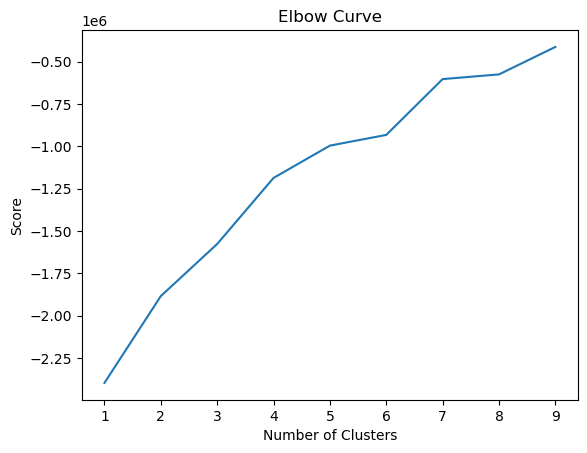

In [22]:
#Plotting the elbow curve

pl.plot(number_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# K-Mean Clustering

This elbow curve suggests that 3 to 5 clusters is a reasonable choice. The biggest improvements happen early in the curve and the gain becomes smaller after 5 clusters. In simple terms, the model stops learning much after this point.

In [23]:
#creating the k-means
kmeans = KMeans(n_clusters = 3)

In [24]:
#putting the kmeans into an object
kmeans.fit(numeric_scaled)

KMeans(n_clusters=3)

In [25]:
numeric_scaled['clusters'] = kmeans.fit_predict(numeric_scaled)

In [26]:
numeric_scaled.head()

,n_killed,n_injured,latitude,longitude,n_guns_involved,total_casualties,is_fatal,has_injuries,high_casualty,multi_victim,clusters
0,-0.483519,4.803055,0.481255,0.306263,-0.220495,3.862692,-0.538266,1.210812,10.631242,2.856793,1
1,1.433006,3.433099,-0.285377,-1.498570,-0.220495,3.862692,1.857818,1.210812,10.631242,2.856793,1
2,1.433006,3.433099,0.612106,0.199231,0.328707,3.862692,1.857818,1.210812,10.631242,2.856793,1
3,7.182580,-0.676767,0.398503,-0.863876,-0.220495,3.862692,1.857818,-0.825892,10.631242,2.856793,1
4,3.349530,2.063144,-0.022795,0.301525,0.328707,3.862692,1.857818,1.210812,10.631242,2.856793,1


In [27]:
# Counting how many rows fall into each cluster to see the size of each group.
numeric_scaled['clusters'].value_counts()

clusters
2    137578
1     94171
0      7928
Name: count, dtype: int64

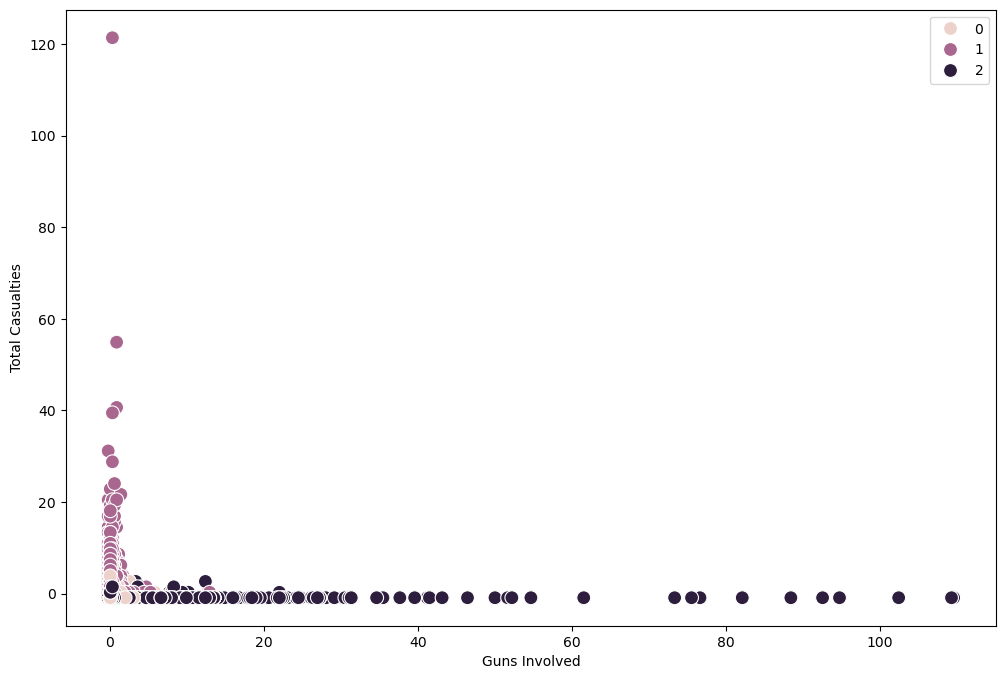

In [28]:
#plotting the clusters for guns involved and total casualites

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_scaled['n_guns_involved'], y=numeric_scaled['total_casualties'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Guns Involved') 
plt.ylabel('Total Casualties') 
plt.show()

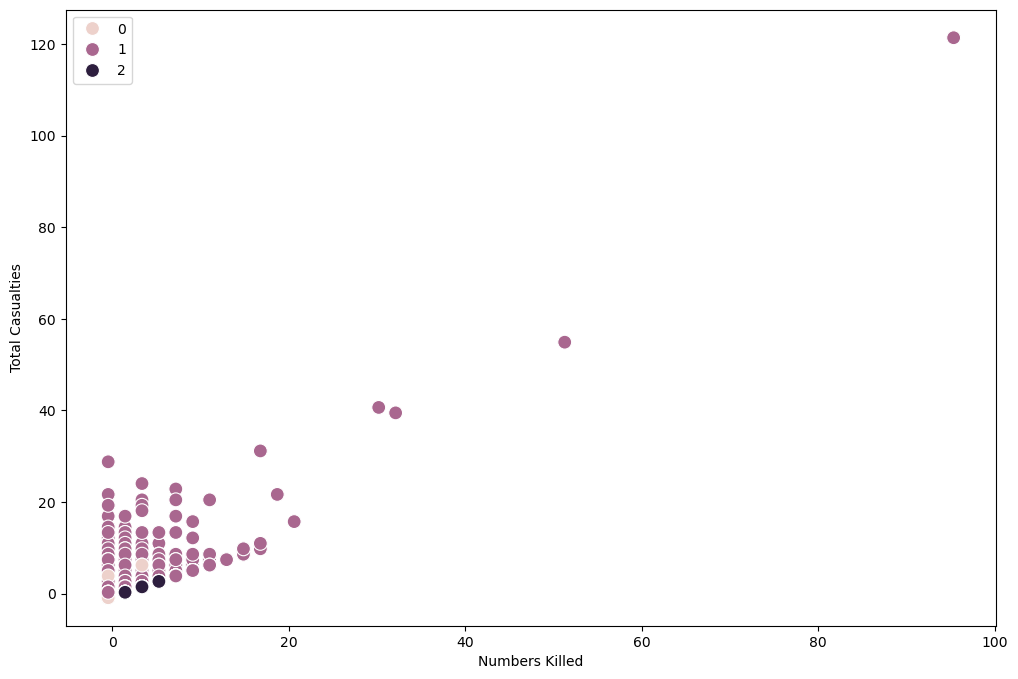

In [29]:
# Plotting the clusters for the numbers killed by gun violence and total casualties variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_scaled['n_killed'], y=numeric_scaled['total_casualties'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Numbers Killed') 
plt.ylabel('Total Casualties') 
plt.show()

The clusters mostly make sense. They divide the incidents into low-severity, moderate-severity, and high-severity groups. The high-severity cluster is clearly separated, but the two lower-severity clusters overlap, showing that casualty counts alone do not strongly differentiate most incidents. 

In [30]:
# Add color labels for each cluster number so they are easier to read and plot.
numeric_scaled.loc[numeric_scaled['clusters'] == 2, 'cluster'] = 'dark purple'
numeric_scaled.loc[numeric_scaled['clusters'] == 1, 'cluster'] = 'purple'
numeric_scaled.loc[numeric_scaled['clusters'] == 0, 'cluster'] = 'pink'


In [31]:
#Calculating the mean and median for key variables within each cluster. 
#This helps compare how the clusters differ in killings, injuries, total casualties, and number of guns involved.

numeric_scaled.groupby('clusters').agg({
    'n_killed': ['mean', 'median'],
    'total_casualties': ['mean', 'median'],
    'n_guns_involved': ['mean', 'median'],
    'n_injured': ['mean', 'median']})


n_killed           total_casualties           n_guns_involved  \
              mean    median             mean    median            mean   
clusters                                                                  
0         0.311810 -0.483519         0.185737  0.301189        0.126809   
1        -0.276971 -0.483519         0.685852  0.301189       -0.067598   
2         0.171616 -0.483519        -0.480163 -0.885979        0.038963   

                   n_injured            
            median      mean    median  
clusters                                
0         0.054106 -0.008551 -0.676767  
1         0.054106  0.989434  0.693189  
2         0.054106 -0.676767 -0.676767

The cluster patterns can show which variables are useful and which ones might need to be added. If injuries strongly separate clusters but guns involved does not, I may explore other gun-related fields (stolen guns, gun types, etc.).


In [32]:
#exporting Dataset
numeric_scaled.to_csv(os.path.join(path,'02 Data','Prepared Data','Numericscaledclusters.csv'))